<h1>NAIVE BAYES</h1>

https://stackoverflow.com/questions/38621053/how-can-i-use-sklearn-naive-bayes-with-multiple-categorical-features
https://stackoverflow.com/questions/14254203/mixing-categorial-and-continuous-data-in-naive-bayes-classifier-using-scikit-lea?rq=1

Now consider the case where you have a dataset consisting of several features:

- Categorical
- Bernoulli
- Normal

Under the very assumption of using NB, these variables are independent. Consequently, you can do the following:

- Build a NB classifier for each of the categorical data separately, using your dummy variables and a multinomial NB.
-  Build a NB classifier for all of the Bernoulli data at once - this is because sklearn's - - Bernoulli NB is simply a shortcut for several single-feature Bernoulli NBs.
- Same as 2 for all the normal features.

<p>By the definition of independence, the probability for an instance, is the product of the probabilities of instances by these classifiers.

### <h1>DATA LOADING

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
import os
os.listdir('../../data')
assert 'out_breed.csv' in os.listdir('../../data') # this assert breaks if the data is configured uncorrectly

In [5]:
breeds = pd.read_csv('../../data/out_breed.csv')
colors = pd.read_csv('../../data/out_color.csv')
states = pd.read_csv('../../data/out_state.csv')
train  = pd.read_csv('../../data/out_train.csv')
test   = pd.read_csv('../../data/out_test.csv')
sub    = pd.read_csv('../../data/out_submission.csv')

In [17]:
train.columns

Index(['Unnamed: 0', 'Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender',
       'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated',
       'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee', 'State',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'dataset_type'],
      dtype='object')

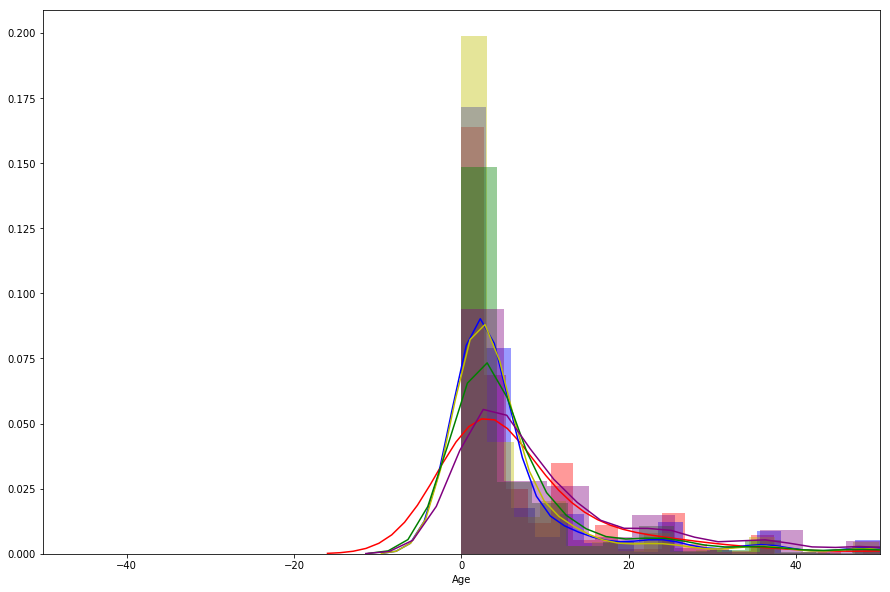

In [26]:
plt.figure(figsize=(15,10))
plt.xlim((-50, 50))
sns.distplot(train[train.AdoptionSpeed == 0]['Age'],color='r')
sns.distplot(train[train.AdoptionSpeed == 1]['Age'],color='b')
sns.distplot(train[train.AdoptionSpeed == 2]['Age'],color='y')
sns.distplot(train[train.AdoptionSpeed == 3]['Age'],color='g')
sns.distplot(train[train.AdoptionSpeed == 4]['Age'],color='purple')

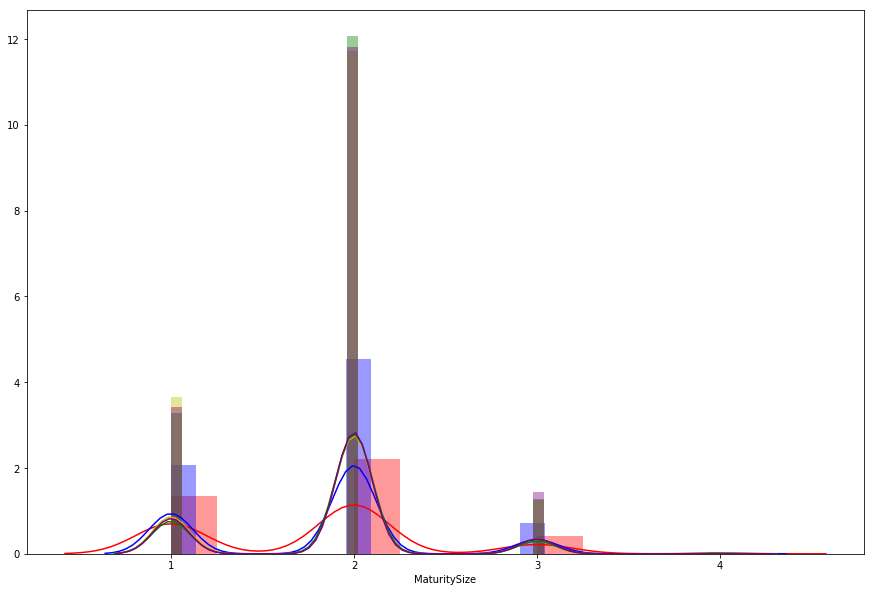

In [20]:
plt.figure(figsize=(15,10))
sns.distplot(train[train.AdoptionSpeed == 0]['MaturitySize'],color='r')
sns.distplot(train[train.AdoptionSpeed == 1]['MaturitySize'],color='b')
sns.distplot(train[train.AdoptionSpeed == 2]['MaturitySize'],color='y')
sns.distplot(train[train.AdoptionSpeed == 3]['MaturitySize'],color='g')
sns.distplot(train[train.AdoptionSpeed == 4]['MaturitySize'],color='purple')

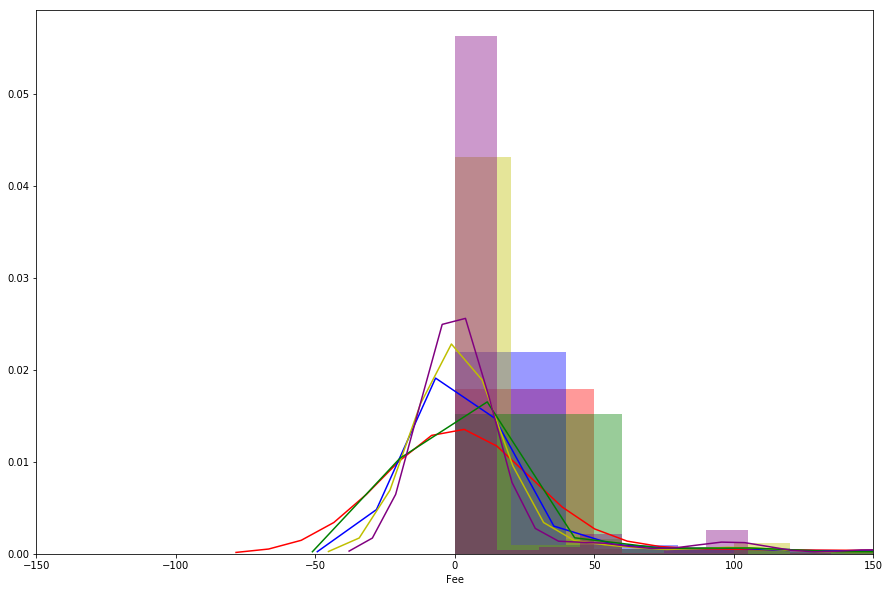

In [27]:
plt.figure(figsize=(15,10))
plt.xlim((-150, 150))
sns.distplot(train[train.AdoptionSpeed == 0]['Fee'],color='r')
sns.distplot(train[train.AdoptionSpeed == 1]['Fee'],color='b')
sns.distplot(train[train.AdoptionSpeed == 2]['Fee'],color='y')
sns.distplot(train[train.AdoptionSpeed == 3]['Fee'],color='g')
sns.distplot(train[train.AdoptionSpeed == 4]['Fee'],color='purple')

In [37]:
non_numerical_cols = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"]
train = train.drop(non_numerical_cols, axis=1)
len(train.columns)

18

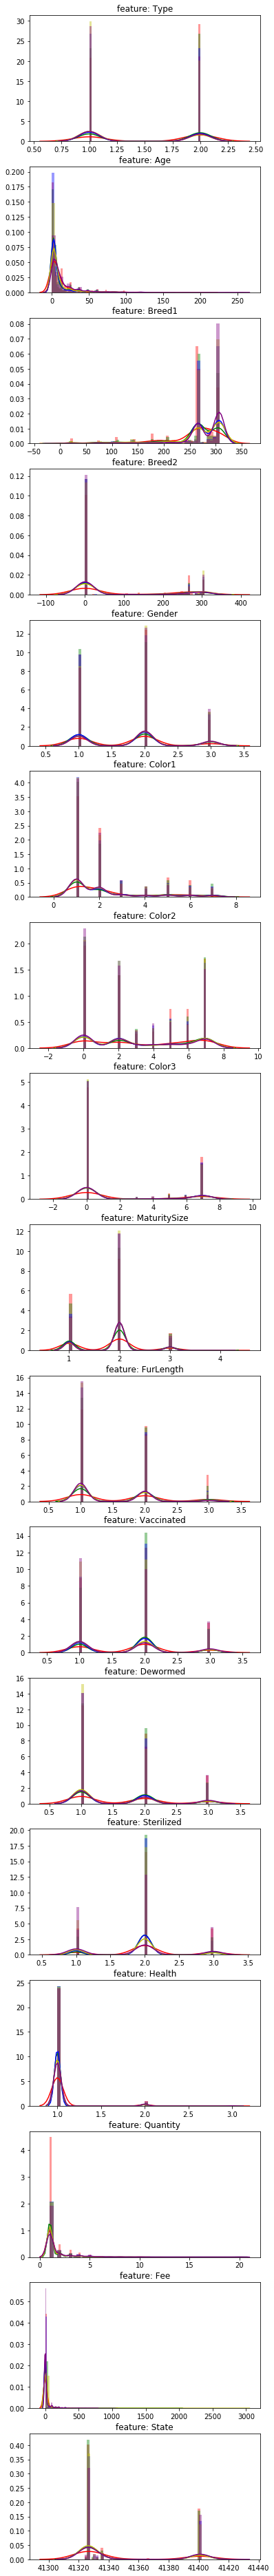

In [41]:
import seaborn as sns
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(17, 1)
plt.figure(figsize=(6,17*4))
for i, col in enumerate(train[train.iloc[:,0:17].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(train[col][train.AdoptionSpeed == 0], bins=50, color='r')
    sns.distplot(train[col][train.AdoptionSpeed == 1], bins=50, color='g')
    sns.distplot(train[col][train.AdoptionSpeed == 2], bins=50, color='b')
    sns.distplot(train[col][train.AdoptionSpeed == 3], bins=50, color='y')
    sns.distplot(train[col][train.AdoptionSpeed == 4], bins=50, color='purple')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
enc=OneHotEncoder(train['Breed1'])

In [46]:
enc.fit_transform(np.array(train['Breed1'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [6]:
df = pd.get_dummies(train['Breed1'])

In [15]:
dummies = pd.get_dummies(train['Breed1'], prefix='', prefix_sep='')
dummies = dummies.T.reindex([str(n) for n in range(1, len(breeds) + 1)]).T.fillna(0)
dummies

,1,2,3,4,5,6,7,8,9,10,...,298,299,300,301,302,303,304,305,306,307
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [18]:
clf.fit(dummies, train.AdoptionSpeed)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
dummies = pd.get_dummies(test['Breed1'], prefix='', prefix_sep='')
dummies = dummies.T.reindex([str(n) for n in range(1, len(breeds) + 1)]).T.fillna(0)
dummies

,1,2,3,4,5,6,7,8,9,10,...,298,299,300,301,302,303,304,305,306,307
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
clf.predict(dummies)

array([4, 2, 2, ..., 1, 1, 4])

In [5]:
from sklearn.naive_bayes import GaussianNB

In [7]:
string_cols = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"]

In [8]:
categorical_col = ["Type","Gender","Vaccinated","Dewormed","Sterilized","Breed1","Breed2","Color1","Color2","Color3","State"]

In [9]:
numerical_col = [col for col in train.columns if col not in string_cols and col not in categorical_col and col != "AdoptionSpeed"]

In [9]:
df = train[numerical_col]

In [11]:
clf = GaussianNB()

In [12]:
clf.fit(df, train.AdoptionSpeed)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
clf.predict(test[numerical_col])

array([1, 2, 2, ..., 4, 2, 2])

<p>https://www.kaggle.com/blackblitz/gaussian-naive-bayes</p>

In [26]:
train[train.AdoptionSpeed == 0].head()

,Unnamed: 0,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,...,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,dataset_type
1,1,2,No Name Yet,1,265,0,1,1,2,0,...,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,train
75,75,1,Coco,2,307,0,2,2,5,0,...,1,0,41336,31de822d0adce3e2dad7dcedfbee2ba8,0,Hi Coco is a rescued puppy from the streets. I...,259b10a3e,1.0,0,train
106,106,2,SYLVESTER,1,266,266,3,1,7,0,...,2,1,41401,9b52af6d48a4521fd01d4028eb5879a3,0,"Kittens found living at restaurant, with sibli...",19b1f4263,3.0,0,train
170,170,2,Sunset,2,292,252,1,2,5,0,...,1,0,41401,2181fc2a61447996c1e5cee02738b5c3,0,*** Looking for someone who really love and ad...,b9590d4de,1.0,0,train
259,259,1,Chanelle,18,20,307,2,2,7,0,...,1,0,41401,c00756f2bdd8fa88fc9f07a8309f7d5d,0,Chanelle found a home!,1c59cecac,10.0,0,train


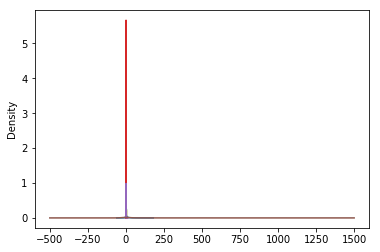

In [15]:
train[train.AdoptionSpeed == 0][numerical_col].plot.kde(ind=100, legend=False)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df = train[numerical_col]

In [22]:
df.head()

,Age,MaturitySize,FurLength,Health,Quantity,Fee
0,3,1,1,1,1,100
1,1,2,2,1,1,0
2,1,2,2,1,1,0
3,4,2,1,1,1,150
4,1,2,1,1,1,0


In [24]:
scaled = pd.DataFrame(StandardScaler().fit_transform(df))

/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
scaled[train.AdoptionSpeed == 0].head()

,0,1,2,3,4,5
1,-0.520627,0.251848,0.888933,-0.183518,-0.391237,-0.271132
75,-0.465546,0.251848,-0.780377,-0.183518,-0.391237,-0.271132
106,-0.520627,0.251848,-0.780377,-0.183518,0.287913,-0.258379
170,-0.465546,-1.573167,-0.780377,-0.183518,-0.391237,-0.271132
259,0.415745,0.251848,-0.780377,-0.183518,-0.391237,-0.271132


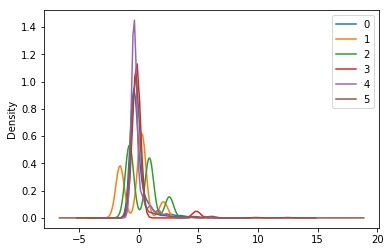

In [29]:
scaled[train.AdoptionSpeed == 0].plot.kde(ind=100)

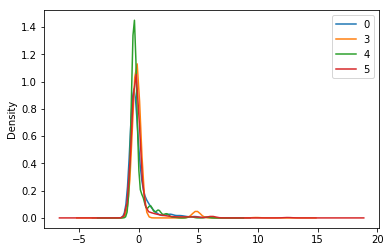

In [77]:
scaled.drop([1,2],axis=1)[train.AdoptionSpeed == 0].plot.kde(ind=100)

In [44]:
numerical_transformed = scaled.drop([1,2],axis=1)

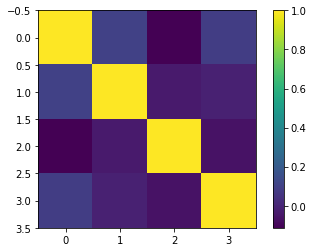

In [47]:
plt.imshow(numerical_transformed.corr())
plt.colorbar()
#0,1,2,3 -> Age, Health, Quantity, Fee

(-0.11, 0.2)

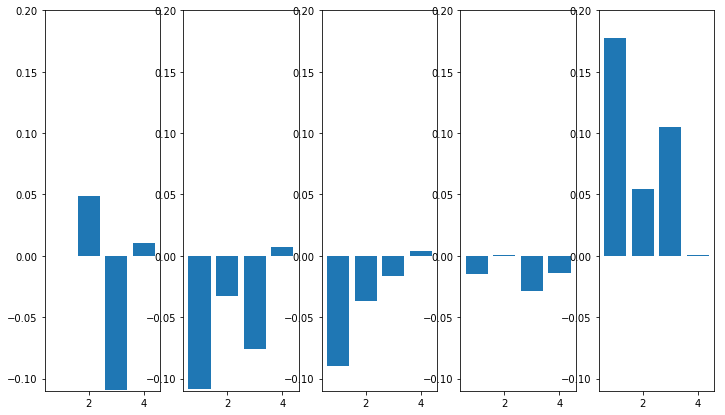

In [73]:
plt.figure(figsize=(12,7))
plt.subplot('151')
plt.bar([1,2,3,4], numerical_transformed[train.AdoptionSpeed == 0].mean())
plt.ylim(-0.11,0.20)
plt.subplot('152')
plt.bar([1,2,3,4], numerical_transformed[train.AdoptionSpeed == 1].mean())
plt.ylim(-0.11,0.20)
plt.subplot('153')
plt.bar([1,2,3,4], numerical_transformed[train.AdoptionSpeed == 2].mean())
plt.ylim(-0.11,0.20)
plt.subplot('154')
plt.bar([1,2,3,4], numerical_transformed[train.AdoptionSpeed == 3].mean())
plt.ylim(-0.11,0.20)
plt.subplot('155')
plt.bar([1,2,3,4], numerical_transformed[train.AdoptionSpeed == 4].mean())
plt.ylim(-0.11,0.20)


In [74]:
from sklearn.naive_bayes import GaussianNB

In [78]:
nb = GaussianNB()

In [79]:
nb.fit(numerical_transformed, train.AdoptionSpeed)

GaussianNB(priors=None, var_smoothing=1e-09)